# Feature selection

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/oxygen

# Correlations between features

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/oxygen#correlation-and-join-features

In [108]:
#Turn off scientific notation
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

#Activate print all activities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [109]:
import pickle
import zstandard
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_4055/3906458195.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-21 08:24:06
Loaded input pickle zst file... 2024-06-21 08:24:06


/tmp/ipykernel_4055/3906458195.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [110]:
df.shape
df.head()

(7255, 20142)

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,arCOG06650@2157,"Viruses,4R0IQ@35237",arCOG09713@2157,arCOG07735@2157,arCOG07334@2157,arCOG04203@2157,arCOG01811@2157,arCOG00087@2157,arCOG07496@2157,Oxygen tolerance
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,anaerobe
108980.91,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,aerobe
1111140.3,1,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,aerobe
1112212.3,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,aerobe
1120962.3,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,aerobe


In [113]:
# Separar as features (X) e o grupos (y)
#Full dataset:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

#Subset for developing:
#X = df.iloc[0:100, 0:100]
#y = df.iloc[0:100, -1] 

In [114]:
# Calcular a correlação de Spearman
correlation_matrix = X.corr(method='spearman')

#Calculating p-values for the correlations
#From ChatGPT - I SHOULD VERIFY THE CODE
#from scipy.stats import spearmanr

# Initialize a DataFrame to store p-values
#p_values = pd.DataFrame(columns=X.columns, index=X.columns)

# Calculate p-values for each pair of columns using Spearman correlation
#for col1 in X.columns:
#    for col2 in X.columns:
#        spearman_corr, p_value = spearmanr(X[col1], X[col2])
#        p_values.loc[col1, col2] = p_value

In [115]:
#OBS: if there is no variability in a column, the correlation will be NA!
correlation_matrix.head()
#p_values.head()

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,arCOG09517@2157,arCOG06650@2157,"Viruses,4R0IQ@35237",arCOG09713@2157,arCOG07735@2157,arCOG07334@2157,arCOG04203@2157,arCOG01811@2157,arCOG00087@2157,arCOG07496@2157
COG3696@2,1.00,0.15,-0.01,0.29,0.59,0.12,0.18,0.02,0.04,0.22,...,-0.01,-0.01,NaN,NaN,NaN,NaN,-0.01,-0.01,-0.01,NaN
COG0606@2,0.15,1.00,0.02,0.28,0.22,0.16,0.51,0.17,0.10,0.30,...,-0.01,-0.01,NaN,NaN,NaN,NaN,-0.01,-0.01,-0.01,NaN
33SZW@2,-0.01,0.02,1.00,0.08,0.03,-0.02,0.03,0.06,0.18,0.00,...,-0.00,-0.00,NaN,NaN,NaN,NaN,-0.00,-0.00,-0.00,NaN
COG0774@1,0.29,0.28,0.08,1.00,0.27,0.05,0.29,0.15,0.31,0.24,...,-0.00,-0.00,NaN,NaN,NaN,NaN,-0.00,-0.00,-0.00,NaN
COG5009@2,0.59,0.22,0.03,0.27,1.00,0.19,0.25,0.02,0.09,0.26,...,-0.01,-0.01,NaN,NaN,NaN,NaN,-0.01,-0.01,-0.01,NaN


In [116]:
#Save calculatons
correlation_matrix.to_csv('data/spearman_corr_df_oxygen_gene-families_selected-filterNA.csv', index=True)

In [147]:
correlation_matrix.shape

(20141, 20141)

In [102]:
#This is just for the mock dataset!
#correlation_matrix = correlation_matrix.drop(columns=correlation_matrix.columns[0])
#correlation_matrix = correlation_matrix.drop(index=correlation_matrix.index[0])

In [161]:
#Prepare for plot below
#Populate down_triangle of the matrix and the 1.0 is diagonals with Na
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flatten the matrix and drop NaN values
correlation_values = upper_triangle.stack().values
len(correlation_values)

#Checking code block above for my mock dataset of 99 columns
#upper_triangle
#len(upper_triangle)     #99
#((99*99)/2) - 99/2      #4851.0
#len(correlation_values) #4851

146504403

In [162]:
upper_triangle.shape

(20141, 20141)

In [163]:
any(np.isnan(x) for x in correlation_values)

False

In [167]:
# Plot the histogram
correlation_values = correlation_values[(correlation_values < -0.1) | (correlation_values > 0.1)]
correlation_values

array([0.15, 0.29, 0.59, ..., 1.00, 1.00, 1.00])

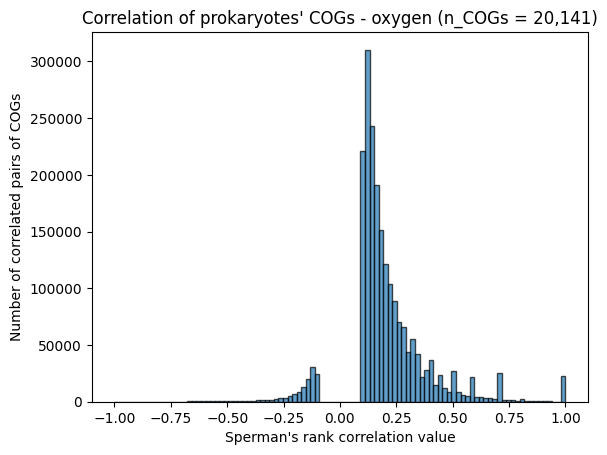

In [168]:
#Visualize distribution of correlations
import matplotlib.pyplot as plt

# Plot the histogram

plt.hist(correlation_values, bins=bins[bins != 0], edgecolor='k', alpha=0.7);
plt.title('Correlation of prokaryotes\' COGs - oxygen (n_COGs = 20,141)')
plt.xlabel('Sperman\'s rank correlation value');
plt.ylabel('Number of correlated pairs of COGs');
#plt.yscale('log')

#plt.savefig('figures/spearman_corr_df_oxygen_gene-families_selected-filterNA.png', dpi=300)  # Salvar o gráfico como imagem
plt.savefig('figures/spearman_corr_df_oxygen_gene-families_selected-filterNA_0.10gap.png', dpi=300)  # Salvar o gráfico como imagem

plt.show();

## Join highly correlated features 

https://github.com/ProfHeydeFranca/BacterialData/blob/main/Join_Features.py